In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
TRAINING_IDENTITY_CSV_PATH = 'dataset/train_identity.csv'
TRAINING_TRANSACTION_CSV_PATH = 'dataset/train_transaction.csv'
TEST_IDENTITY_CSV_PATH = 'dataset/test_identity.csv'
TEST_TRANSACTION_CSV_PATH = 'dataset/test_transaction.csv'

In [3]:
df_train_identity = pd.read_csv(TRAINING_IDENTITY_CSV_PATH)
df_train_transaction = pd.read_csv(TRAINING_TRANSACTION_CSV_PATH)
df_train = pd.merge(df_train_transaction, df_train_identity, on='TransactionID', how='left')
df_train.shape

(590540, 434)

In [4]:
df_test_identity = pd.read_csv(TEST_IDENTITY_CSV_PATH)
df_test_transaction = pd.read_csv(TEST_TRANSACTION_CSV_PATH)
df_test = pd.merge(df_test_transaction, df_test_identity, on='TransactionID', how='left')
df_test.shape

(506691, 433)

In [5]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [6]:
# Columns to Drop with data less than 50%
null_percent = df_train.isnull().sum()/df_train.shape[0]*100
cols_to_drop = np.array(null_percent[null_percent > 50].index)
cols_to_drop

array(['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9',
       'D12', 'D13', 'D14', 'M5', 'M7', 'M8', 'M9', 'V138', 'V139',
       'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147',
       'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155',
       'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163',
       'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171',
       'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179',
       'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187',
       'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195',
       'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203',
       'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211',
       'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219',
       'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227',
       'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235',
       '

In [7]:
# Updating the DataFrame
df_train = df_train.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)
df_train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=220)

In [8]:
# Fill the null values with mode of the column
null_cols = df_train.columns[df_train.isna().any()].tolist()

for i in null_cols:
    print('data type of {} is {}'.format(i, str(df_train[i].dtype)))
    df_train[i] = df_train[i].replace(np.nan, df_train[i].mode()[0])
    print('Filled the null values of column {}'.format(i))
    print('---------------------------------------------')

data type of card2 is float64
Filled the null values of column card2
---------------------------------------------
data type of card3 is float64
Filled the null values of column card3
---------------------------------------------
data type of card4 is object
Filled the null values of column card4
---------------------------------------------
data type of card5 is float64
Filled the null values of column card5
---------------------------------------------
data type of card6 is object
Filled the null values of column card6
---------------------------------------------
data type of addr1 is float64
Filled the null values of column addr1
---------------------------------------------
data type of addr2 is float64
Filled the null values of column addr2
---------------------------------------------
data type of P_emaildomain is object
Filled the null values of column P_emaildomain
---------------------------------------------
data type of D1 is float64
Filled the null values of column D1
----

Filled the null values of column V55
---------------------------------------------
data type of V56 is float64
Filled the null values of column V56
---------------------------------------------
data type of V57 is float64
Filled the null values of column V57
---------------------------------------------
data type of V58 is float64
Filled the null values of column V58
---------------------------------------------
data type of V59 is float64
Filled the null values of column V59
---------------------------------------------
data type of V60 is float64
Filled the null values of column V60
---------------------------------------------
data type of V61 is float64
Filled the null values of column V61
---------------------------------------------
data type of V62 is float64
Filled the null values of column V62
---------------------------------------------
data type of V63 is float64
Filled the null values of column V63
---------------------------------------------
data type of V64 is float64
F

Filled the null values of column V128
---------------------------------------------
data type of V129 is float64
Filled the null values of column V129
---------------------------------------------
data type of V130 is float64
Filled the null values of column V130
---------------------------------------------
data type of V131 is float64
Filled the null values of column V131
---------------------------------------------
data type of V132 is float64
Filled the null values of column V132
---------------------------------------------
data type of V133 is float64
Filled the null values of column V133
---------------------------------------------
data type of V134 is float64
Filled the null values of column V134
---------------------------------------------
data type of V135 is float64
Filled the null values of column V135
---------------------------------------------
data type of V136 is float64
Filled the null values of column V136
---------------------------------------------
data type of

In [10]:
null_cols = df_test.columns[df_test.isna().any()].tolist()

for i in null_cols:
    print('data type of {} is {}'.format(i, str(df_test[i].dtype)))
    df_test[i] = df_train[i].replace(np.nan, df_test[i].mode()[0])
    print('Filled the null values of column {}'.format(i))
    print('---------------------------------------------')

data type of card2 is float64
Filled the null values of column card2
---------------------------------------------
data type of card3 is float64
Filled the null values of column card3
---------------------------------------------
data type of card4 is object
Filled the null values of column card4
---------------------------------------------
data type of card5 is float64
Filled the null values of column card5
---------------------------------------------
data type of card6 is object
Filled the null values of column card6
---------------------------------------------
data type of addr1 is float64
Filled the null values of column addr1
---------------------------------------------
data type of addr2 is float64
Filled the null values of column addr2
---------------------------------------------
data type of P_emaildomain is object
Filled the null values of column P_emaildomain
---------------------------------------------
data type of C1 is float64
Filled the null values of column C1
----

Filled the null values of column V41
---------------------------------------------
data type of V42 is float64
Filled the null values of column V42
---------------------------------------------
data type of V43 is float64
Filled the null values of column V43
---------------------------------------------
data type of V44 is float64
Filled the null values of column V44
---------------------------------------------
data type of V45 is float64
Filled the null values of column V45
---------------------------------------------
data type of V46 is float64
Filled the null values of column V46
---------------------------------------------
data type of V47 is float64
Filled the null values of column V47
---------------------------------------------
data type of V48 is float64
Filled the null values of column V48
---------------------------------------------
data type of V49 is float64
Filled the null values of column V49
---------------------------------------------
data type of V50 is float64
F

Filled the null values of column V300
---------------------------------------------
data type of V301 is float64
Filled the null values of column V301
---------------------------------------------
data type of V302 is float64
Filled the null values of column V302
---------------------------------------------
data type of V303 is float64
Filled the null values of column V303
---------------------------------------------
data type of V304 is float64
Filled the null values of column V304
---------------------------------------------
data type of V305 is float64
Filled the null values of column V305
---------------------------------------------
data type of V306 is float64
Filled the null values of column V306
---------------------------------------------
data type of V307 is float64
Filled the null values of column V307
---------------------------------------------
data type of V308 is float64
Filled the null values of column V308
---------------------------------------------
data type of

In [12]:
# Divide the features and labels
X_train = df_train.drop('isFraud', axis=1)
y_train = df_train['isFraud']

In [14]:
# Finding the data with categorical and numerical data
cat_data = X_train.select_dtypes(include='object')
num_data = X_train.select_dtypes(exclude='object')

cat_cols = cat_data.columns.values
num_cols = num_data.columns.values

print('Categorical Columns : ', cat_cols)
print('Numerical Columns : ', num_cols)

Categorical Columns :  ['ProductCD' 'card4' 'card6' 'P_emaildomain' 'M1' 'M2' 'M3' 'M4' 'M6']
Numerical Columns :  ['TransactionID' 'TransactionDT' 'TransactionAmt' 'card1' 'card2' 'card3'
 'card5' 'addr1' 'addr2' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9'
 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D4' 'D10' 'D11' 'D15' 'V1'
 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13' 'V14'
 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25' 'V26'
 'V27' 'V28' 'V29' 'V30' 'V31' 'V32' 'V33' 'V34' 'V35' 'V36' 'V37' 'V38'
 'V39' 'V40' 'V41' 'V42' 'V43' 'V44' 'V45' 'V46' 'V47' 'V48' 'V49' 'V50'
 'V51' 'V52' 'V53' 'V54' 'V55' 'V56' 'V57' 'V58' 'V59' 'V60' 'V61' 'V62'
 'V63' 'V64' 'V65' 'V66' 'V67' 'V68' 'V69' 'V70' 'V71' 'V72' 'V73' 'V74'
 'V75' 'V76' 'V77' 'V78' 'V79' 'V80' 'V81' 'V82' 'V83' 'V84' 'V85' 'V86'
 'V87' 'V88' 'V89' 'V90' 'V91' 'V92' 'V93' 'V94' 'V95' 'V96' 'V97' 'V98'
 'V99' 'V100' 'V101' 'V102' 'V103' 'V104' 'V105' 'V106' 'V107' 'V108'
 'V109' 'V110' 

In [15]:
# Taking the logarithm of the Transaction Amount
X_train['TransactionAmt'] = X_train['TransactionAmt'].apply(np.log)
df_test['TransactionAmt'] = df_test['TransactionAmt'].apply(np.log)

In [16]:
# tqdm Library for showing the progress bar
from tqdm import tqdm

for i in tqdm(cat_cols):
    label = LabelEncoder()
    label.fit(list(X_train[i].values)+list(df_test[i].values))
    X_train[i] = label.transform(list(X_train[i].values))
    df_test[i] = label.transform(list(df_test[i].values))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:42<00:00, 11.39s/it]


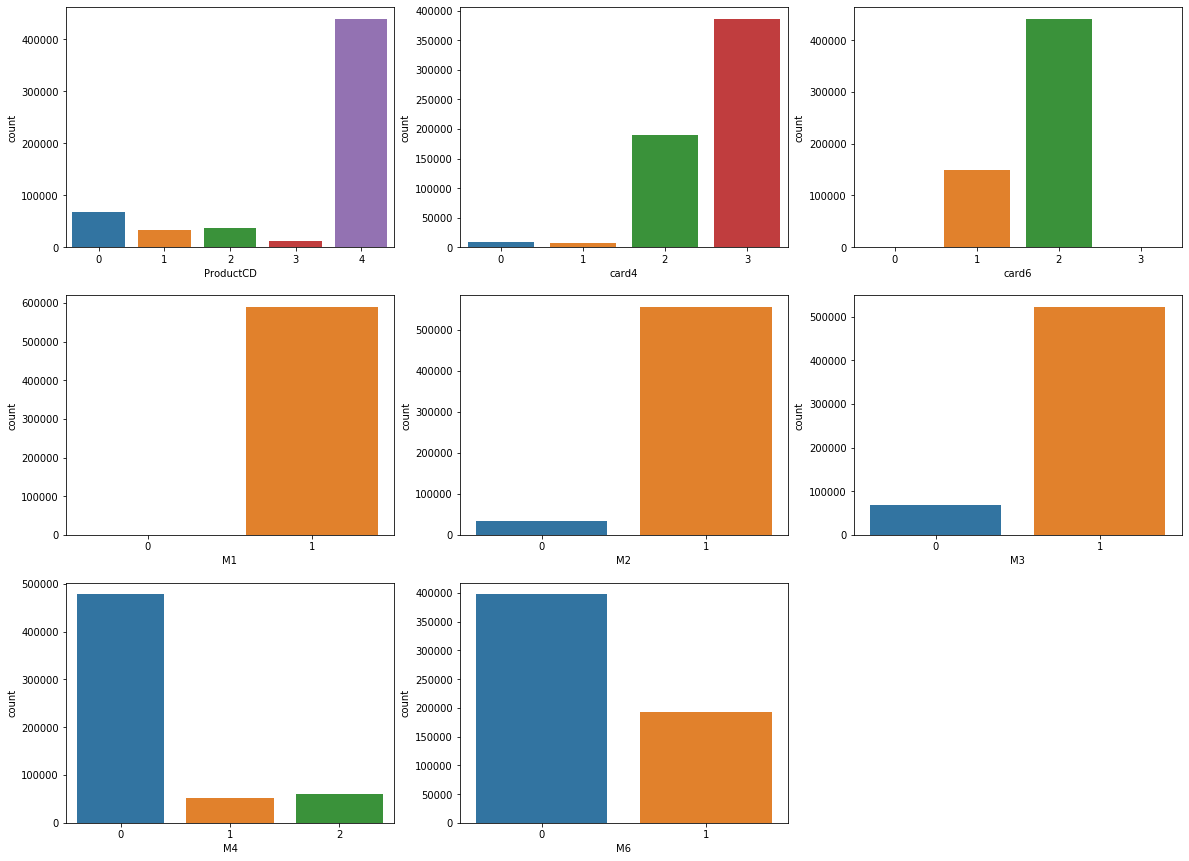

In [18]:
# Plotting the graph all the categorical data
fig = plt.figure(figsize=(20,15))

j = 1
for i in cat_cols:
    if(i == 'P_emaildomain'):
        continue
    plt.subplot(3,3,j)
    sns.countplot(x=X_train[i])
    j += 1
    
plt.show()

Text(0.5, 1.0, 'Fraud or Not')

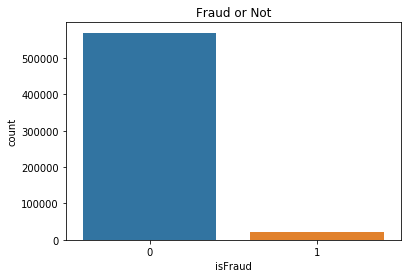

In [19]:
# Count of Fraud vs NOT
sns.countplot(x=y_train)
plt.title('Fraud or Not')

In [20]:
# Dropping the Dates column
X_train_final = X_train.drop('TransactionDT', axis=1)
test_final = df_test.drop('TransactionDT', axis=1)
X_train = X_train_final
df_test = test_final

In [21]:
# Create and Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
import pickle

filename = 'model.pkl'
classifier = LogisticRegression(C=0.09, solver='lbfgs', class_weight='balanced')
classifier.fit(X_train, y_train)
pickle.dump(classifier, open(filename, 'wb'))

d:\ml\env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [22]:
# Create the prediction
pred = classifier.predict(df_test)

In [23]:
# Check the score of the Classifier
score = classifier.score(X_train, y_train)
print(score)

0.4543163883902869


In [24]:
# AT LAST
# Create the Submission File
sub = pd.read_csv('dataset/sample_submission.csv')
sub['isFraud'] = pred
sub.head()

,TransactionID,isFraud
0,3663549,1
1,3663550,1
2,3663551,0
3,3663552,1
4,3663553,1


In [25]:
sub.to_csv('submission.csv', index=False)